# COGS 108 - Final Project 

# Overview

Health inspection scores in the state of New York can be predicted by the amount of critical and noncritical violations found during a health inspections. So that the lower the health inspection score the more critical and noncritical violations found during an inspection. However this relationship is very weak with low coeficient values found in the OLS Regression Results.

# Name & PID

- Name: Isabelle Parker
- PID: A16168390

# Research Question

Is there a relationship between the health inspection scores and the number of critical violations found during health inspection in New York?

## Background and Prior Work

Restaurants in the United States are regularly inspected by local, county, or state health department personnel. The guidelines of the U.S. Food and Drug Administration (FDA) state that “a principal goal to be achieved by a food establishment inspection is to prevent foodborne disease” (1). The FDA sets codes and regulations called the 'Food Code' that are enforced by state and local health departments (2). The food code sets model regulations that state and local health departments use as a reference, or in many cases, adopt as legal requirements(3). Although the Food Code esists it is not federal law and therefore it is still up to individual states to write their own food safety rules, although most states align their regulations closely with the recommendations of the FDA.
A restaurant health inspection is graded out of one hundred and seen bellow is the grade scale (3):

- 90 or higher  ~	Good 	~  One or two low-risk violations (May have one high-risk violation)
- 80-89         ~  Adequate ~  Several low-risk violations (May have one high-risk violation)
- 70-79  ~  Needs Improvement 	~ Multiple low- and high-risk violations
- 69 or lower   ~	Poor 	~  Many low- and high-risk violations

There are many different types of violatons however, violations are split into two overarching categories; critical and non critical. Critical violations are violations that if left uncorrected, are more likely than other violations to directly contribute to food contamination, illness, or environmental health hazard. Examples of critical violations include poor temperature control of food, improper cooking, cooling, refrigeration or reheating temperatures. Such items must be corrected within a time frame not to exceed 5 calendar days after the inspection (4). Noncritical violations on the other hand are violations that are generally not directly related to the cause of foodborne illness, but if uncorrected, could impede the operation of the restaurant. Noncritical violations, if left uncorrected, could lead to critical violations. Examples of noncritical violations include a lack of facility cleanliness and maintenance or improper cleaning of equipment and utensils (4).

References:
- 1) Timothy F. Jones, Restaurant Inspection Scores and Foodborne Disease, US National Library of Medicine, https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3323064/
- 2)  Dave Roos, How Restaurant Health Inspections Work, howstuffworks, https://recipes.howstuffworks.com/tools-and-techniques/restaurant-health-inspections1.htm
- 3) Preparing for a Health Inspection, webstaurantstore, https://www.webstaurantstore.com/article/16/health-inspection-checklist.html#fda
- 4) Understanding Food Establishment Inspectionshttps, DC health, https://dchealth.dc.gov/service/understanding-food-establishment-inspections

# Hypothesis


I hypothesize that there is a negative relationship between the number of critical violations found during a health inspection and the overall health inspection score given to a restaurant in the state of New York. There in, the more critical violations found during a health inspection the lower the oversall health inspection score given to a given restaurant.

# Dataset(s)

- Dataset Name: inspections
- Link to the dataset:inspections.csv
- Number of observations:18466

This data set contains information about the inspections conducted in the US including:
- inspection score (out of 100)
- number of critical violations found
- number of noncritical violations found

This information allows us to see the inspection scores for each restaurant and the number of critical and noncritical violations found during each inspection in the state of New York.


# Setup

In [102]:
#import pandas and mumpy
import pandas as pd
import numpy as np

# Import seaborn and apply its plotting styles
import seaborn as sns
sns.set(style="white", font_scale=2)

# import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
# set plotting size parameter
plt.rcParams['figure.figsize'] = (17, 7)

# Statmodels & patsy
import patsy
import statsmodels.api as sm
from scipy.stats import pearsonr, norm, ttest_ind
from scipy.stats import skewnorm

# Data Cleaning

Describe your data cleaning steps here.

In [103]:
#read in csv files
df = pd.read_csv('inspections.csv')

#drop unrelated and personal data
df = df.drop(columns = ['name', 'date', 'address1', 'address2', 'city', 'zip', 'critical', 'postalcode', 'phonenumber', 'restaurantopendate', 'x',
                          'y', 'geocodestatus', 'type', 'description', 'inspectedby'])
df.head()

,hsisid,state,days_from_open_date,facilitytype,inspection_num,inspector_id,previous_inspection_date,days_since_previous_inspection,previous_inspection_by_same_inspector,score,num_critical,num_non_critical,num_critical_previous,num_non_critical_previous,num_critical_mean_previous,num_non_critical_mean_previous,avg_neighbor_num_critical,avg_neighbor_num_non_critical,top_match,second_match
0,4092013748,NC,3562,Restaurant,1,27.0,NaN,NaN,NaN,96.0,9,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4092014046,NC,3062,Restaurant,1,7.0,NaN,NaN,NaN,98.0,0,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4092015191,NC,1509,Restaurant,1,3.0,NaN,NaN,NaN,97.0,4,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4092016122,NC,177,Restaurant,1,24.0,NaN,NaN,NaN,99.0,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4092021513,NC,1670,Food Stand,1,7.0,NaN,NaN,NaN,97.0,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Analysis & Results

Include cells that describe the steps in your data analysis.

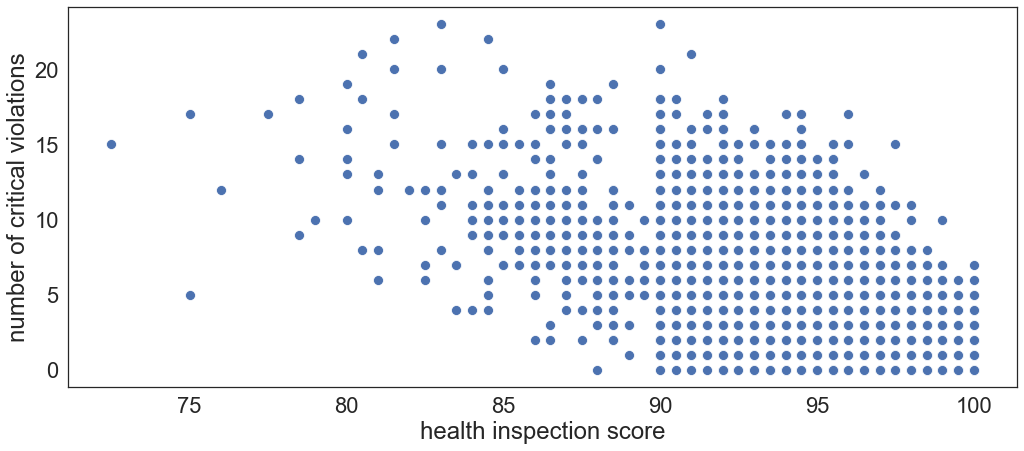

In [104]:
#exploratory plot
sns.scatterplot(x='score', y='num_critical', data=df, s=100)
plt.xlabel('health inspection score')
plt.ylabel('number of critical violations');

Text(0.5, 0, 'Health Inspection Score')

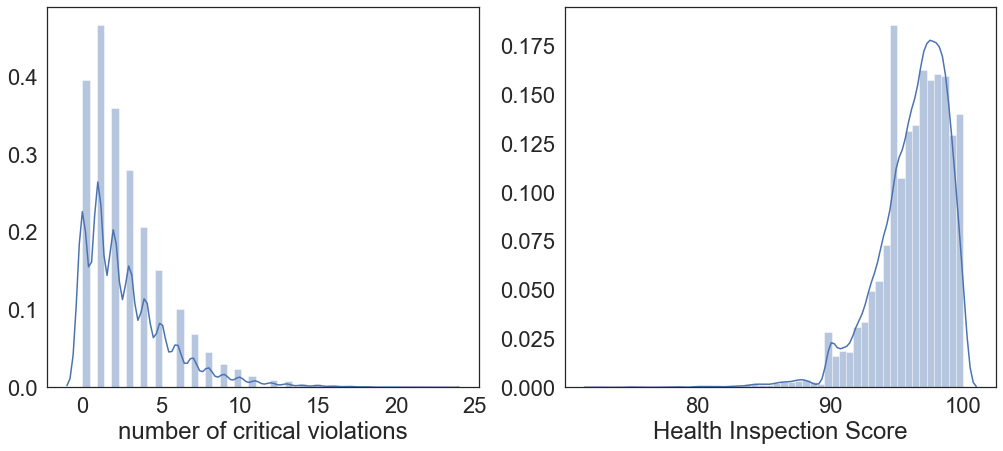

In [105]:
#see relationship between variable with histograms
plt.subplot(1, 2, 1)
sns.distplot(df['num_critical'])
plt.xlabel('number of critical violations')

plt.subplot(1, 2, 2)
sns.distplot(df['score'])
plt.xlabel('Health Inspection Score')

In [106]:
#linear regression
#design matrix
outcome, predictors = patsy.dmatrices('score ~ num_critical', df)

In [107]:
#run model
mod = sm.OLS(outcome, predictors)

In [108]:
## fit the model
res = mod.fit()

## look at the results
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                 1.462e+04
Date:                Tue, 09 Jun 2020   Prob (F-statistic):               0.00
Time:                        12:26:33   Log-Likelihood:                -38841.
No. Observations:               18466   AIC:                         7.769e+04
Df Residuals:                   18464   BIC:                         7.770e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       98.0216      0.021   4720.936   

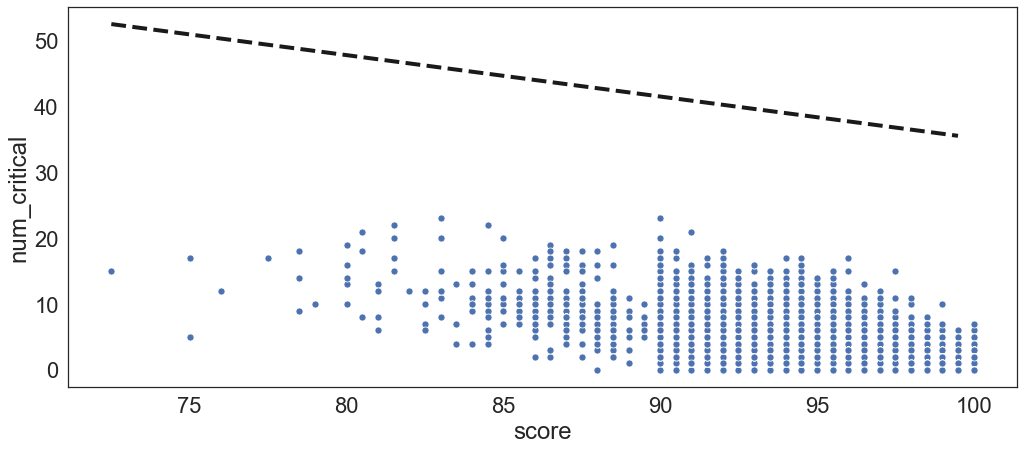

In [109]:
## plot model for data
sns.scatterplot(df.score, df.num_critical, s=50);

# Generate and plot the model fit line
xs = np.arange(df.score.min(), df.score.max())
ys = res.params[1] * xs + res.params[0]
plt.plot(xs, ys, '--k', linewidth=4, label='Model');

In [110]:
print('model beta: ' , res.params[1])
print('corr: ', pearsonr(df.score,df.num_critical)[0])

model beta:  -0.6280156380427401
corr:  -0.6647966360056313


In [111]:
#Multiple linear regression
outcome, predictors = patsy.dmatrices('score ~ num_critical + num_non_critical', df)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                 1.140e+04
Date:                Tue, 09 Jun 2020   Prob (F-statistic):               0.00
Time:                        12:26:34   Log-Likelihood:                -36802.
No. Observations:               18466   AIC:                         7.361e+04
Df Residuals:                   18463   BIC:                         7.363e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           98.9235      0.023  

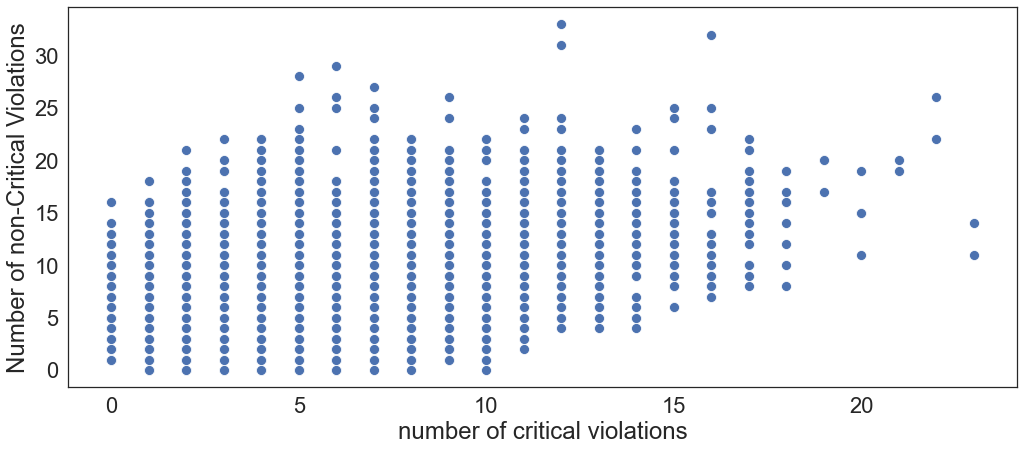

In [112]:
# relationship between predictors
sns.scatterplot(x='num_critical', y='num_non_critical', data=df, s=100)
plt.xlabel('number of critical violations')
plt.ylabel('Number of non-Critical Violations');

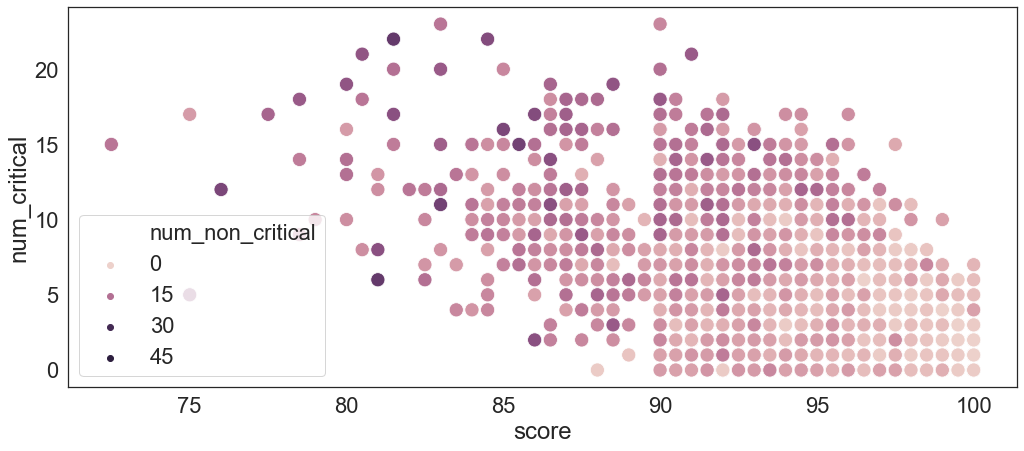

In [113]:
# color by num_non_critical
sns.scatterplot(x='score', y='num_critical', hue='num_non_critical', 
                data=df, s=200 );

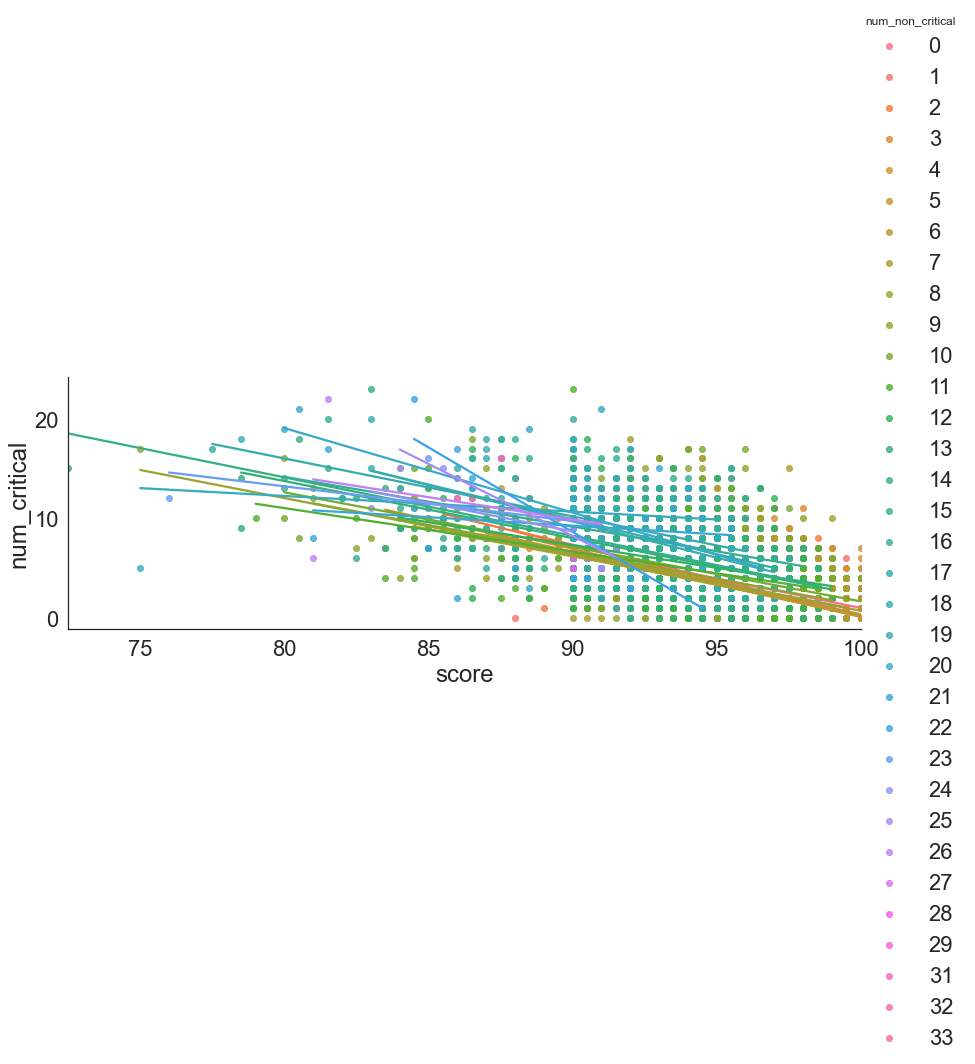

In [114]:
# plot with regression line
sns.lmplot(x="score", y="num_critical", hue="num_non_critical", 
           data=df, ci=None, aspect=2.5);

# Ethics & Privacy

The dataset used contained information that if used would be in violation of the 'Safe Harbor method'. The Safe Harbor Method requires that the following identifiers of the individual or of relatives, employers, or household members of the individual, are removed:
- Names
- Geographic Subdivisions smaller than a state
- Dates (such as birth dates, etc), and all ages above 90
- Telephone Numbers
- Vehicle Identification Numbers
- Fax numbers
- Device identifiers and serial numbers
- Email addresses
- Web Universal Resource Locators (URLs)
- Social security numbers
- Internet Protocol (IP) addresses
- Medical record numbers
- Biometric identifiers, including finger and voice prints
- Health plan beneficiary numbers
- Full-face photographs and any comparable images
- Account numbers
- Certificate/license numbers

For this dataset I had to drop columns that had private information mentioned in the Safe Harbor method including:
- name
- date
- address1
- address2
- city
- zip
- postalcode
- phonenumber
- inspectedby

All other information used for this data analysis was ethical and didn't violation any privacy regulations. As the results of my data analysis can only be used to ensure that the current health inspection system is working correctly and accurately. By making sure that the more critical and noncritical violations found during a health inspection the lower the health inspection score is for that restaurant in New York.



# Conclusion & Discussion

My hypothesis was supported by the data analysis above that there is a negative relationship between the number of critical violations found during a health inspection and the overall health inspection score given to a restaurant in the state of New York. It is seen that the more critical violations found during a health inspection the lower the oversall health inspection score given to a given restaurant. 

However this relationship is not as negative as I predicted it would be with a coeficient of -0.6 shown in the linear regression OLS Regression Results. After completing a multivariate linear regression model with both the number of critical violations and noncritical violations the critical violation coeficient decreased futher to -0.4 with the noncritical violations number being a third variable that was creating the illusion of the critical violation variable having more impact on the health inspection score than was true. the noncritical violation variable had a coeficient of -0.2. 

Therefore, there is a negative relationship between the number of critical violations found during and inspection and the score of a health inspection this relationship is weak as there is also a relationship between the number of noncritical violations found and the helath inspection score. It is seen that as the number of critical and noncritical violations increases over the health inspectio socre slightly decreases.

